In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import matplotlib.dates as mdates
import datetime


In [17]:
%matplotlib inline

In [18]:
a_mobility = pd.read_csv("../applemobilitytrends-2020-07-29.csv") 

In [19]:
nyc_mobility = a_mobility[a_mobility["region"]=="New York City"]
nyc_mobility

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29
642,city,New York City,driving,NYC,New York,United States,100.0,101.51,104.51,108.78,...,118.19,123.11,119.40,123.38,135.89,141.19,115.37,122.71,123.50,129.46
643,city,New York City,transit,NYC,New York,United States,100.0,92.66,95.29,96.42,...,44.56,46.42,42.97,43.37,46.23,51.61,43.28,47.13,46.83,49.14
644,city,New York City,walking,NYC,New York,United States,100.0,96.09,105.77,101.73,...,67.03,72.32,66.10,70.44,78.79,90.53,67.45,70.48,71.98,76.30


In [20]:
nyc_transposed = nyc_mobility.iloc[:,7:].transpose()

In [21]:
nyc_mobility = nyc_transposed.rename(columns={642:"driving",643:"transit",644:"walking"})

In [22]:
nyc_mobility

,driving,transit,walking
2020-01-14,101.51,92.66,96.09
2020-01-15,104.51,95.29,105.77
2020-01-16,108.78,96.42,101.73
2020-01-17,122.44,107.50,117.09
2020-01-18,99.70,101.22,115.37
...,...,...,...
2020-07-25,141.19,51.61,90.53
2020-07-26,115.37,43.28,67.45
2020-07-27,122.71,47.13,70.48
2020-07-28,123.50,46.83,71.98


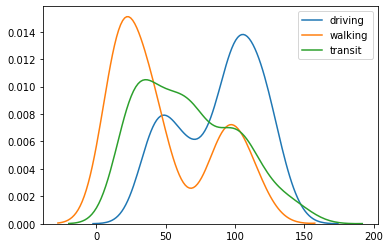

In [23]:
sns.kdeplot(nyc_mobility["driving"].dropna())
sns.kdeplot(nyc_mobility["transit"].dropna())
sns.kdeplot(nyc_mobility["walking"].dropna())
plt.legend(labels=['driving', 'walking', 'transit'])

In [26]:
nyc_mobility = nyc_mobility.reset_index()
nyc_mobility = nyc_mobility.rename(columns={"index":"date"})

In [27]:
nyc_mobility[nyc_mobility["date"]=="2020-06-06"]

,date,driving,transit,walking
144,2020-06-06,100.86,26.42,58.64


In [28]:
nyc_driving = nyc_mobility["driving"].tolist()
nyc_transit = nyc_mobility["transit"].tolist()
nyc_walking = nyc_mobility["walking"].tolist()
nyc_mobility_dates = nyc_mobility["date"].tolist()

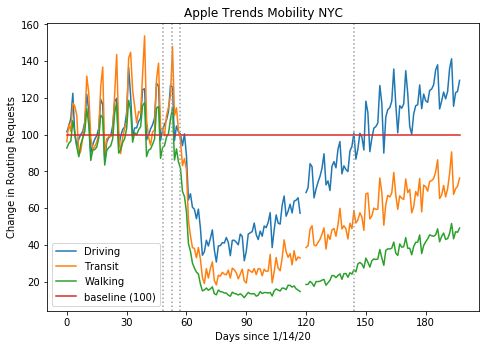

In [29]:
# plot apple mobility data
#create figure 
fig_mobility = plt.figure()
amob_axes = fig_mobility.add_axes([1,1,1,1])
amob_axes.plot(range(0,198),nyc_driving, label="Driving")
amob_axes.plot(range(0,198),nyc_walking, label="Transit")
amob_axes.plot(range(0,198),nyc_transit, label="Walking")
# plot baseline of 100
amob_axes.plot(range(0,198),list(map(lambda x: 100, rangeList)), label="baseline (100)")
# add vlines at dates of interest
amob_axes.axvline(x=48, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=53, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=57, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=144, color="#9e9e9e",linestyle=":")
amob_axes.set_title("Apple Trends Mobility NYC")
amob_axes.set_xlabel("Date")
amob_axes.set_ylabel("Change in Routing Requests")
amob_axes.legend(loc=0)
amob_axes.xaxis.set_ticks(np.arange(0,210,30))

In [30]:
g_mobility = pd.read_csv("../Global_Mobility_Report.csv")
gnyc_mobility = g_mobility[g_mobility["sub_region_1"]=="New York"]

/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
df = gnyc_mobility.iloc[:164].reset_index()
df[df["date"]=="2020-03-01"]

,index,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15,1161811,US,United States,New York,NaN,NaN,US-NY,NaN,2020-03-01,10.0,5.0,9.0,0.0,3.0,-1.0


In [149]:
df[df["date"]=="2020-06-06"]

,index,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
112,1161908,US,United States,New York,NaN,NaN,US-NY,NaN,2020-06-06,-42.0,-4.0,74.0,-47.0,-21.0,8.0


In [136]:
new_york_mob = gnyc_mobility.iloc[:164]
new_york_mob.rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail & Rec",
                            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & Pharmacy",
                            "parks_percent_change_from_baseline":"Parks",
                            "transit_stations_percent_change_from_baseline":"Transit",
                            "workplaces_percent_change_from_baseline":"Workplaces",
                            "residential_percent_change_from_baseline": "Residential"}).describe().iloc[:,1:]


,Retail & Rec,Grocery & Pharmacy,Parks,Transit,Workplaces,Residential
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,-34.646341,-7.225610,22.597561,-46.310976,-36.524390,13.914634
std,22.096205,11.819878,46.073657,22.133607,20.959924,9.038705
min,-75.000000,-44.000000,-64.000000,-76.000000,-73.000000,-1.000000
25%,-53.000000,-15.000000,-10.000000,-64.000000,-52.250000,6.000000
50%,-37.500000,-6.000000,16.000000,-50.000000,-43.000000,14.000000
75%,-23.000000,0.000000,55.250000,-40.750000,-19.750000,21.250000
max,10.000000,28.000000,141.000000,3.000000,6.000000,32.000000


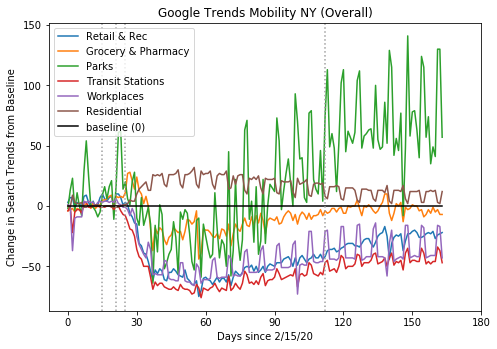

In [150]:
# similar to google mobility data
rangeList = list(range(0,164))
fig_mobility = plt.figure()
amob_axes = fig_mobility.add_axes([1,1,1,1])
amob_axes.plot(range(0,164),new_york_mob["retail_and_recreation_percent_change_from_baseline"], label="Retail & Rec")
amob_axes.plot(range(0,164),new_york_mob["grocery_and_pharmacy_percent_change_from_baseline"], label="Grocery & Pharmacy")
amob_axes.plot(range(0,164),new_york_mob["parks_percent_change_from_baseline"], label="Parks")
amob_axes.plot(range(0,164),new_york_mob["transit_stations_percent_change_from_baseline"], label="Transit Stations")
amob_axes.plot(range(0,164),new_york_mob["workplaces_percent_change_from_baseline"], label="Workplaces")
amob_axes.plot(range(0,164),new_york_mob["residential_percent_change_from_baseline"], label="Residential")
amob_axes.plot(range(0,164),list(map(lambda x: 0, rangeList)), label="baseline (0)",color="black")
amob_axes.axvline(x=15, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=21, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=25, color="#9e9e9e",linestyle=":")
amob_axes.axvline(x=112, color="#9e9e9e",linestyle=":")
amob_axes.set_title("Google Trends Mobility NY (Overall)")
amob_axes.set_xlabel("Days since 2/15/20")
amob_axes.set_ylabel("Change in Search Trends from Baseline")
amob_axes.legend(loc=0)
amob_axes.xaxis.set_ticks(np.arange(0,210,30))

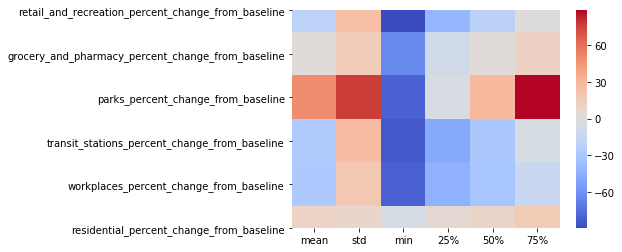

In [168]:
sns.heatmap(gnyc_mobility.describe().iloc[:,1:].iloc[1:7].transpose(), cmap="coolwarm")

In [140]:
working_gnyc = gnyc_mobility.iloc[:,8:].rename(columns={
    "retail_and_recreation_percent_change_from_baseline":"retail",
    "grocery_and_pharmacy_percent_change_from_baseline":"grocery/pharmacy",
    "parks_percent_change_from_baseline": "parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplaces",
    "residential_percent_change_from_baseline": "residential"
})

In [193]:
nyc_boro = pd.read_csv("../NYC Data/coronavirus-data/boro/boroughs-case-hosp-death.csv")

In [194]:
nyc_boro.head()

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,4,0,0,3,0,1,2,0,0,2,0,0,0,0
1,03/01/2020,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0
2,03/02/2020,0,4,0,0,9,0,0,4,0,0,4,0,0,0,0
3,03/03/2020,0,5,0,1,7,0,0,2,0,1,5,0,0,1,0
4,03/04/2020,1,5,0,0,6,0,2,6,0,2,3,0,0,2,0


In [195]:
nyc_boro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 16 columns):
DATE_OF_INTEREST         154 non-null object
BK_CASE_COUNT            154 non-null int64
BK_HOSPITALIZED_COUNT    154 non-null int64
BK_DEATH_COUNT           154 non-null int64
BX_CASE_COUNT            154 non-null int64
BX_HOSPITALIZED_COUNT    154 non-null int64
BX_DEATH_COUNT           154 non-null int64
MN_CASE_COUNT            154 non-null int64
MN_HOSPITALIZED_COUNT    154 non-null int64
MN_DEATH_COUNT           154 non-null int64
QN_CASE_COUNT            154 non-null int64
QN_HOSPITALIZED_COUNT    154 non-null int64
QN_DEATH_COUNT           154 non-null int64
SI_CASE_COUNT            154 non-null int64
SI_HOSPITALIZED_COUNT    154 non-null int64
SI_DEATH_COUNT           154 non-null int64
dtypes: int64(15), object(1)
memory usage: 19.4+ KB


In [202]:
nyc_bk = nyc_boro.iloc[:,1:7]
nyc_bk

,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT
0,0,4,0,0,3,0
1,0,0,0,0,1,0
2,0,4,0,0,9,0
3,0,5,0,1,7,0
4,1,5,0,0,6,0
...,...,...,...,...,...,...
149,57,9,1,23,8,1
150,52,11,1,26,8,3
151,43,5,0,18,3,1
152,29,2,1,9,1,0


In [204]:
nyc_bk.corr()

,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT
BK_CASE_COUNT,1.000000,0.955272,0.799378,0.965354,0.948192,0.798413
BK_HOSPITALIZED_COUNT,0.955272,1.000000,0.839030,0.956173,0.989119,0.836083
BK_DEATH_COUNT,0.799378,0.839030,1.000000,0.877050,0.873790,0.984267
BX_CASE_COUNT,0.965354,0.956173,0.877050,1.000000,0.961113,0.874260
BX_HOSPITALIZED_COUNT,0.948192,0.989119,0.873790,0.961113,1.000000,0.871772
BX_DEATH_COUNT,0.798413,0.836083,0.984267,0.874260,0.871772,1.000000


In [209]:
nyc_mn = nyc_boro.iloc[:,7:10]
nyc_mn

,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT
0,1,2,0
1,0,0,0
2,0,4,0
3,0,2,0
4,2,6,0
...,...,...,...
149,42,4,1
150,30,1,1
151,19,2,0
152,10,0,0


In [210]:
nyc_mn.corr()

,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT
MN_CASE_COUNT,1.000000,0.920817,0.687606
MN_HOSPITALIZED_COUNT,0.920817,1.000000,0.806794
MN_DEATH_COUNT,0.687606,0.806794,1.000000


In [217]:
nyc_qn = nyc_boro.iloc[:,10:13]
nyc_qn

,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT
0,0,2,0
1,0,2,0
2,0,4,0
3,1,5,0
4,2,3,0
...,...,...,...
149,47,11,0
150,34,6,2
151,23,2,1
152,14,0,0


In [88]:
new_york_mob =  new_york_mob.rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail & Rec",
                            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & Pharmacy",
                            "parks_percent_change_from_baseline":"Parks",
                            "transit_stations_percent_change_from_baseline":"Transit",
                            "workplaces_percent_change_from_baseline":"Workplaces",
                            "residential_percent_change_from_baseline": "Residential"})


In [124]:
df = pd.read_csv("../nyt-data/covid-19-data/us-counties.csv")
ndf = df[((df["county"] == "Nassau")) & (df["state"]=="New York")]
sdf = df[((df["county"] == "Suffolk")) & (df["state"]=="New York")]
ndf

,date,county,state,fips,cases,deaths
564,2020-03-05,Nassau,New York,36059.0,1,0
626,2020-03-06,Nassau,New York,36059.0,4,0
714,2020-03-07,Nassau,New York,36059.0,4,0
819,2020-03-08,Nassau,New York,36059.0,5,0
946,2020-03-09,Nassau,New York,36059.0,17,0
...,...,...,...,...,...,...
387835,2020-07-31,Nassau,New York,36059.0,43203,2706
391052,2020-08-01,Nassau,New York,36059.0,43271,2706
394268,2020-08-02,Nassau,New York,36059.0,43322,2706
397485,2020-08-03,Nassau,New York,36059.0,43380,2706


In [130]:
df = pd.read_csv("../scraped-li-data.csv")

,Date,Index,Daily Cases in Nassau,Daily Cases in Suffolk,Daily Cases in LI,Total Deaths Nassau,Total Deaths Suffolk,Total Deaths in LI,New Deaths Nassau,New Deaths Suffolk,New Deaths in LI,Total Hospitalizations Nassau,Total Hospitalizations Suffolk,Total Hospitalizations on LI,New Hospitalizations in Nassau,New Hospitalizations in Suffolk,New Hospitalizations in LI
0,03/05/2020,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,03/06/2020,2.0,3.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,03/07/2020,3.0,2.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,03/08/2020,4.0,4.0,1.0,5.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,03/09/2020,5.0,4.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,07/24/2020,142.0,55.0,49.0,104.0,2193.0,1995,4188.0,0.0,0.0,0.0,48.0,NaN,NaN,NaN,NaN,NaN
142,07/25/2020,143.0,45.0,61.0,106.0,2193.0,1996,4189.0,0.0,1.0,1.0,47.0,NaN,NaN,NaN,NaN,NaN
143,07/26/2020,144.0,57.0,84.0,141.0,2194.0,1996,4190.0,1.0,0.0,1.0,43.0,NaN,NaN,NaN,NaN,NaN
144,07/27/2020,145.0,42.0,57.0,99.0,2194.0,1996,4190.0,0.0,0.0,0.0,39.0,NaN,NaN,NaN,NaN,NaN


In [34]:
_dir = "../NYC Data/coronavirus-data/"
df = pd.read_csv(_dir + "boro/boroughs-case-hosp-death.csv")
df[df["DATE_OF_INTEREST"]=="06/06/2020"]

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
98,06/06/2020,60,12,10,51,17,12,32,8,2,98,9,11,7,0,0


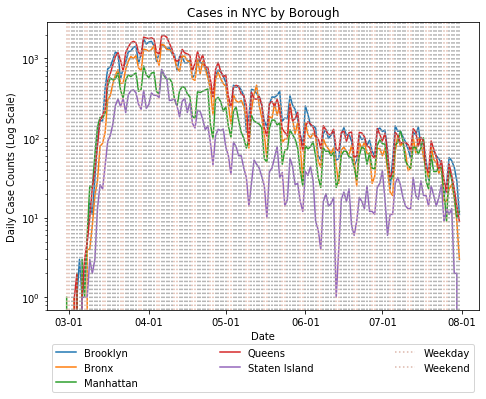

In [85]:
dates = pd.to_datetime(df["DATE_OF_INTEREST"])
# graphing data from NYC openhealth data
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot_date(dates, df["BK_CASE_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["BX_CASE_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["MN_CASE_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["QN_CASE_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["SI_CASE_COUNT"], marker="", linestyle="solid")
# looking for trends between weekdays vs weekends
for i in dates:
    if i.weekday()<=4:
         ax.axvline(x=i, color="#9e9e9e",linestyle=":")
    elif i.weekday()>4:
         ax.axvline(x=i, color="#deb8ab",linestyle=":")
# label graph, add legend, convert to log scale, and format dates
ax.set_xlabel("Date")
ax.set_ylabel("Daily Case Counts (Log Scale)")
ax.set_title("Cases in NYC by Borough")
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island", "Weekday", "Weekend"],loc="lower left", mode="expand",ncol=3,bbox_to_anchor=(0,-0.3,1,0.2))
# visualize changes more easily
ax.set_yscale('log')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()


6

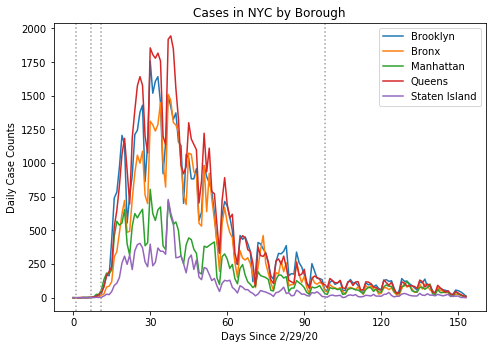

In [73]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,154), df["BK_CASE_COUNT"])
ax.plot(range(0,154), df["BX_CASE_COUNT"])
ax.plot(range(0,154), df["MN_CASE_COUNT"])
ax.plot(range(0,154), df["QN_CASE_COUNT"])
ax.plot(range(0,154), df["SI_CASE_COUNT"])
ax.axvline(x=1, color="#9e9e9e",linestyle=":")
ax.axvline(x=7, color="#9e9e9e",linestyle=":")
ax.axvline(x=11, color="#9e9e9e",linestyle=":")
ax.axvline(x=98, color="#9e9e9e",linestyle=":")
ax.set_xlabel("Days Since 2/29/20")
ax.set_ylabel("Daily Case Counts")
ax.set_title("Cases in NYC by Borough")
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island"])
ax.xaxis.set_ticks(np.arange(0,180,30))

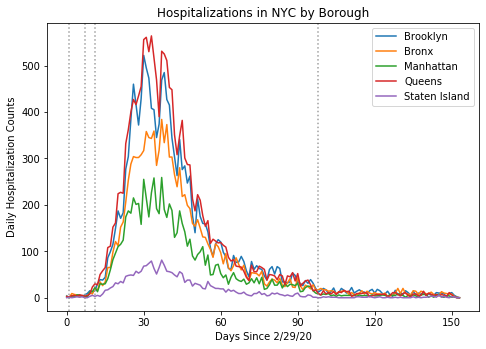

In [72]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,154), df["BK_HOSPITALIZED_COUNT"])
ax.plot(range(0,154), df["BX_HOSPITALIZED_COUNT"])
ax.plot(range(0,154), df["MN_HOSPITALIZED_COUNT"])
ax.plot(range(0,154), df["QN_HOSPITALIZED_COUNT"])
ax.plot(range(0,154), df["SI_HOSPITALIZED_COUNT"])
ax.axvline(x=1, color="#9e9e9e",linestyle=":")
ax.axvline(x=7, color="#9e9e9e",linestyle=":")
ax.axvline(x=11, color="#9e9e9e",linestyle=":")
ax.axvline(x=98, color="#9e9e9e",linestyle=":")
ax.set_xlabel("Days Since 2/29/20")
ax.set_ylabel("Daily Hospitalization Counts")
ax.set_title("Hospitalizations in NYC by Borough")
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island"])
ax.xaxis.set_ticks(np.arange(0,180,30))

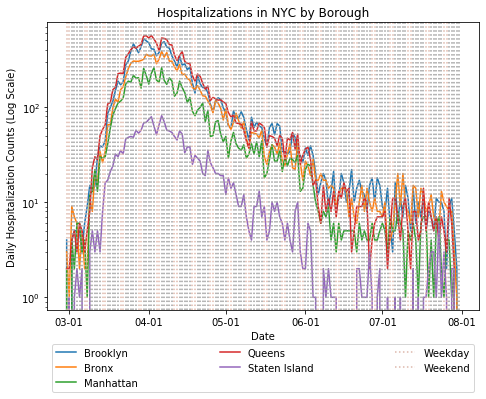

In [87]:
dates = pd.to_datetime(df["DATE_OF_INTEREST"])
# graphing data from NYC openhealth data
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot_date(dates, df["BK_HOSPITALIZED_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["BX_HOSPITALIZED_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["MN_HOSPITALIZED_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["QN_HOSPITALIZED_COUNT"], marker="", linestyle="solid")
ax.plot(dates, df["SI_HOSPITALIZED_COUNT"], marker="", linestyle="solid")
# looking for trends between weekdays vs weekends
for i in dates:
    if i.weekday()<=4:
         ax.axvline(x=i, color="#9e9e9e",linestyle=":")
    elif i.weekday()>4:
         ax.axvline(x=i, color="#deb8ab",linestyle=":")
# label graph, add legend, convert to log scale, and format dates
ax.set_xlabel("Date")
ax.set_ylabel("Daily Hospitalization Counts (Log Scale)")
ax.set_title("Hospitalizations in NYC by Borough")
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island", "Weekday", "Weekend"],loc="lower left", mode="expand",ncol=3,bbox_to_anchor=(0,-0.3,1,0.2))
# visualize changes more easily
ax.set_yscale('log')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()

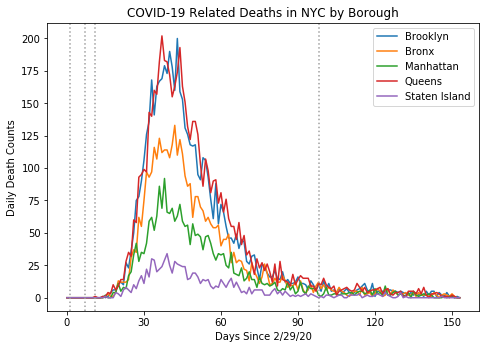

In [71]:
# plot deaths nyc data
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,154), df["BK_DEATH_COUNT"])
ax.plot(range(0,154), df["BX_DEATH_COUNT"])
ax.plot(range(0,154), df["MN_DEATH_COUNT"])
ax.plot(range(0,154), df["QN_DEATH_COUNT"])
ax.plot(range(0,154), df["SI_DEATH_COUNT"])
ax.axvline(x=1, color="#9e9e9e",linestyle=":")
ax.axvline(x=7, color="#9e9e9e",linestyle=":")
ax.axvline(x=11, color="#9e9e9e",linestyle=":")
ax.axvline(x=98, color="#9e9e9e",linestyle=":")
ax.set_xlabel("Days Since 2/29/20")
ax.set_ylabel("Daily Death Counts")
ax.set_title("COVID-19 Related Deaths in NYC by Borough")
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island"])
ax.xaxis.set_ticks(np.arange(0,180,30))

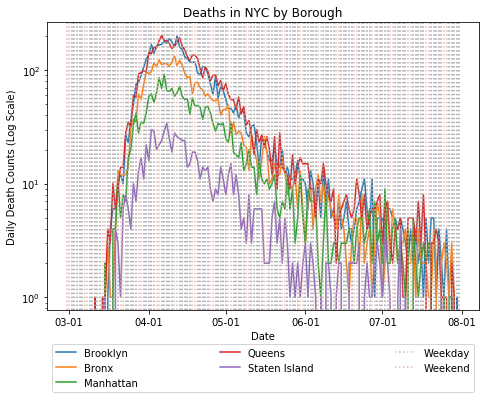

In [89]:
dates = pd.to_datetime(df["DATE_OF_INTEREST"])
# graphing data from NYC openhealth data
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot_date(dates, df["BK_DEATH_COUNT"], marker="", linestyle="solid")
ax.plot_date(dates, df["BX_DEATH_COUNT"], marker="", linestyle="solid")
ax.plot_date(dates, df["MN_DEATH_COUNT"], marker="", linestyle="solid")
ax.plot_date(dates, df["QN_DEATH_COUNT"], marker="", linestyle="solid")
ax.plot_date(dates, df["SI_DEATH_COUNT"], marker="", linestyle="solid")
# looking for trends between weekdays vs weekends using vlines
for i in dates:
    if i.weekday()<=4:
         ax.axvline(x=i, color="#9e9e9e",linestyle=":")
    elif i.weekday()>4:
         ax.axvline(x=i, color="#deb8ab",linestyle=":")
# label graph, add legend, convert to log scale, and format dates
ax.set_xlabel("Date")
ax.set_ylabel("Daily Death Counts (Log Scale)")
ax.set_title("Deaths in NYC by Borough")
# move legend out of graph, blocks otherwise
ax.legend(["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island", "Weekday", "Weekend"],loc="lower left", mode="expand",ncol=3,bbox_to_anchor=(0,-0.3,1,0.2))
# visualize changes more easily w/ log scale
ax.set_yscale('log')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()

In [91]:
# Summing Data from all boroughs
df["T_CASES"] = df["BK_CASE_COUNT"] + df["BX_CASE_COUNT"] + df["MN_CASE_COUNT"] + df["QN_CASE_COUNT"] + df["SI_CASE_COUNT"]
df["T_HOSPITALIZED"] = df["BK_HOSPITALIZED_COUNT"] + df["BX_HOSPITALIZED_COUNT"] + df["MN_HOSPITALIZED_COUNT"] + df["QN_HOSPITALIZED_COUNT"] + df["SI_HOSPITALIZED_COUNT"]
df["T_DEATH"] = df["BK_DEATH_COUNT"] + df["BX_DEATH_COUNT"] + df["MN_DEATH_COUNT"] + df["QN_DEATH_COUNT"] + df["SI_DEATH_COUNT"]


In [92]:
df2 = pd.read_csv(_dir+"tests.csv")
df2[df2["DATE"]=="06/06/2020"]

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,PERCENT_POSITIVE_3DAYS_AGG
95,06/06/2020,13197,374,0.028,0.03


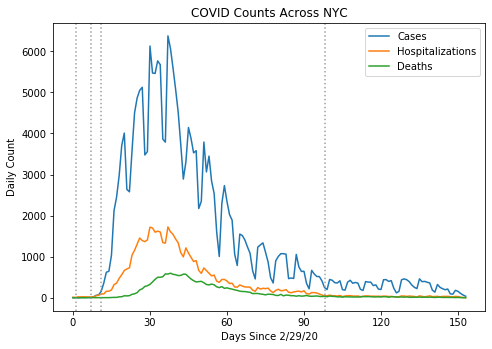

In [97]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,154), df["T_CASES"])
ax.plot(range(0,154), df["T_HOSPITALIZED"])
ax.plot(range(0,154), df["T_DEATH"])
ax.set_xlabel("Days Since 2/29/20")
ax.set_ylabel("Daily Count")
ax.axvline(x=1, color="#9e9e9e",linestyle=":")
ax.axvline(x=7, color="#9e9e9e",linestyle=":")
ax.axvline(x=11, color="#9e9e9e",linestyle=":")
ax.axvline(x=98, color="#9e9e9e",linestyle=":")
ax.set_title("COVID Counts Across NYC")
ax.legend(["Cases","Hospitalizations", "Deaths"])
ax.xaxis.set_ticks(np.arange(0,180,30))

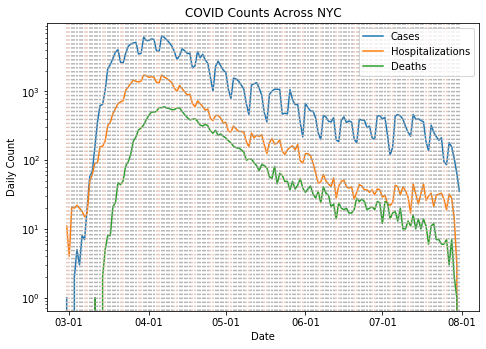

In [99]:
# relationship between hosp, cases, deaths
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(dates, df["T_CASES"])
ax.plot(dates, df["T_HOSPITALIZED"])
ax.plot(dates, df["T_DEATH"])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Count")
ax.set_title("COVID Counts Across NYC")
ax.legend(["Cases","Hospitalizations", "Deaths"])
for i in dates:
    if i.weekday()<=4:
         ax.axvline(x=i, color="#9e9e9e",linestyle=":")
    elif i.weekday()>4:
         ax.axvline(x=i, color="#deb8ab",linestyle=":")
ax.set_yscale("log")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()

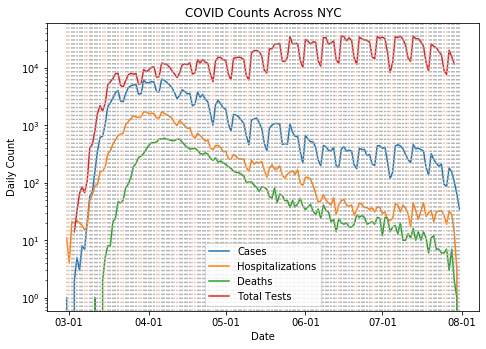

In [101]:
# relationship between testing and covid counts
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(dates, df["T_CASES"])
ax.plot(dates, df["T_HOSPITALIZED"])
ax.plot(dates, df["T_DEATH"])
ax.plot(pd.to_datetime(df2["DATE"]), df2["TOTAL_TESTS"])
ax.set_xlabel("Date")
ax.set_ylabel("Daily Count")
ax.set_title("COVID Counts Across NYC")
ax.legend(["Cases","Hospitalizations", "Deaths", "Total Tests"])
for i in dates:
    if i.weekday()<=4:
         ax.axvline(x=i, color="#9e9e9e",linestyle=":")
    elif i.weekday()>4:
         ax.axvline(x=i, color="#deb8ab",linestyle=":")
ax.set_yscale("log")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()

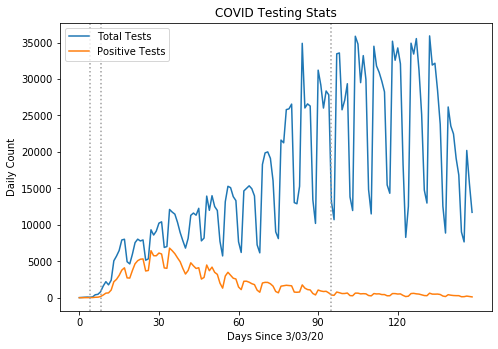

In [65]:
# plot testing data
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,149), df2["TOTAL_TESTS"])
ax.plot(range(0,149), df2["POSITIVE_TESTS"])
ax.set_xlabel("Days Since 3/03/20")
ax.set_ylabel("Daily Count")
ax.set_title("COVID Testing Stats")
ax.axvline(x=4, color="#9e9e9e",linestyle=":")
ax.axvline(x=8, color="#9e9e9e",linestyle=":")
ax.axvline(x=95, color="#9e9e9e",linestyle=":")
ax.legend(["Total Tests", "Positive Tests"])
ax.xaxis.set_ticks(np.arange(0,150,30))

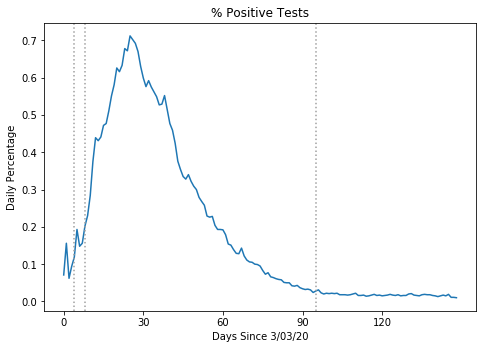

In [64]:
# plot positive cases % over time
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,149), df2["PERCENT_POSITIVE"])
ax.set_xlabel("Days Since 3/03/20")
ax.set_ylabel("Daily Percentage")
ax.set_title("% Positive Tests")
ax.axvline(x=4, color="#9e9e9e",linestyle=":")
ax.axvline(x=8, color="#9e9e9e",linestyle=":")
ax.axvline(x=95, color="#9e9e9e",linestyle=":")
ax.xaxis.set_ticks(np.arange(0,150,30))

In [34]:
_dir = "../nyt-data/covid-19-data/"
df = pd.read_csv(_dir + "mask-use/mask-use-by-county.csv")
df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [80]:
# calculate estimated population %
pop = 8399000
df["T_CASES_%"] = df["T_CASES"]/8399000
df["T_HOSPITALIZED_%"] = df["T_HOSPITALIZED"]/8399000
df["T_DEATH_%"] = df["T_DEATH"]/8399000

In [81]:
df

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,...,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,T_CASES,T_HOSPITALIZED,T_DEATH,T_CASES_%,T_HOSPITALIZED_%,T_DEATH_%
0,02/29/2020,0,4,0,0,3,0,1,2,0,...,0,0,0,0,1,11,0,1.190618e-07,1.309680e-06,0.000000e+00
1,03/01/2020,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,4,0,0.000000e+00,4.762472e-07,0.000000e+00
2,03/02/2020,0,4,0,0,9,0,0,4,0,...,0,0,0,0,0,21,0,0.000000e+00,2.500298e-06,0.000000e+00
3,03/03/2020,0,5,0,1,7,0,0,2,0,...,0,0,1,0,2,20,0,2.381236e-07,2.381236e-06,0.000000e+00
4,03/04/2020,1,5,0,0,6,0,2,6,0,...,0,0,2,0,5,22,0,5.953090e-07,2.619359e-06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,07/27/2020,57,9,1,23,8,1,42,4,1,...,0,11,0,0,180,32,3,2.143112e-05,3.809977e-06,3.571854e-07
150,07/28/2020,52,11,1,26,8,3,30,1,1,...,2,13,2,0,155,28,7,1.845458e-05,3.333730e-06,8.334326e-07
151,07/29/2020,43,5,0,18,3,1,19,2,0,...,1,2,2,0,105,14,2,1.250149e-05,1.666865e-06,2.381236e-07
152,07/30/2020,29,2,1,9,1,0,10,0,0,...,0,2,0,0,64,3,1,7.619955e-06,3.571854e-07,1.190618e-07


In [95]:
df["T_CASES_%"][1]

0.0

In [99]:
for i in range(1,154):
    num = df["T_CASES_%"][i-1]
    df["T_CASES_%"][i] += num

/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
df

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,...,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,T_CASES,T_HOSPITALIZED,T_DEATH,T_CASES_%,T_HOSPITALIZED_%,T_DEATH_%
0,02/29/2020,0,4,0,0,3,0,1,2,0,...,0,0,0,0,1,11,0,1.190618e-07,1.309680e-06,0.000000e+00
1,03/01/2020,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,4,0,1.190618e-07,4.762472e-07,0.000000e+00
2,03/02/2020,0,4,0,0,9,0,0,4,0,...,0,0,0,0,0,21,0,1.190618e-07,2.500298e-06,0.000000e+00
3,03/03/2020,0,5,0,1,7,0,0,2,0,...,0,0,1,0,2,20,0,3.571854e-07,2.381236e-06,0.000000e+00
4,03/04/2020,1,5,0,0,6,0,2,6,0,...,0,0,2,0,5,22,0,9.524943e-07,2.619359e-06,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,07/27/2020,57,9,1,23,8,1,42,4,1,...,0,11,0,0,180,32,3,2.638814e-02,3.809977e-06,3.571854e-07
150,07/28/2020,52,11,1,26,8,3,30,1,1,...,2,13,2,0,155,28,7,2.640660e-02,3.333730e-06,8.334326e-07
151,07/29/2020,43,5,0,18,3,1,19,2,0,...,1,2,2,0,105,14,2,2.641910e-02,1.666865e-06,2.381236e-07
152,07/30/2020,29,2,1,9,1,0,10,0,0,...,0,2,0,0,64,3,1,2.642672e-02,3.571854e-07,1.190618e-07


In [101]:
for i in range(1,154):
    num = df["T_HOSPITALIZED_%"][i-1]
    df["T_HOSPITALIZED_%"][i] += num
for i in range(1,154):
    num = df["T_DEATH_%"][i-1]
    df["T_DEATH_%"][i] += num

/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


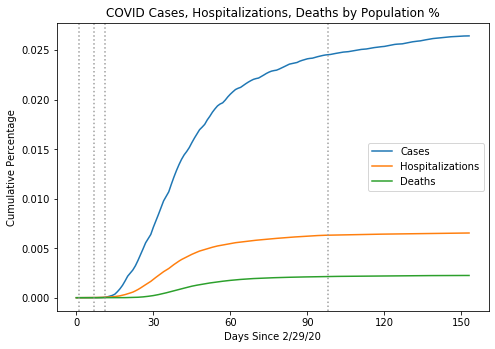

In [103]:
# nyc gov health plotting cases, hospitalizaed, deaths by pop %
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(range(0,154), df["T_CASES_%"])
ax.plot(range(0,154), df["T_HOSPITALIZED_%"])
ax.plot(range(0,154), df["T_DEATH_%"])
ax.set_xlabel("Days Since 2/29/20")
ax.set_ylabel("Cumulative Percentage")
ax.axvline(x=1, color="#9e9e9e",linestyle=":")
ax.axvline(x=7, color="#9e9e9e",linestyle=":")
ax.axvline(x=11, color="#9e9e9e",linestyle=":")
ax.axvline(x=98, color="#9e9e9e",linestyle=":")
ax.set_title("COVID Cases, Hospitalizations, Deaths by Population %")
ax.legend(["Cases","Hospitalizations", "Deaths"])
ax.xaxis.set_ticks(np.arange(0,180,30))

In [152]:
df = pd.read_csv("../covid-tracking-project-ny.csv")
df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200805,NY,418225,5808210,NaN,564.0,89995.0,134.0,NaN,69.0,...,6226435,4,0,f16995e7aabcaff873da5e93b8a73ad31635634b,0,0,0,0,0,NaN
1,20200804,NY,417589,5736178,NaN,568.0,89995.0,139.0,NaN,69.0,...,6153767,3,0,84b8716ddeb6ddfb438768ef19c62856846e73f3,0,0,0,0,0,NaN
2,20200803,NY,416843,5665931,NaN,536.0,89995.0,136.0,NaN,62.0,...,6082774,2,0,d34a46fc8547c1b30fcb63dc21256c4256878091,0,0,0,0,0,NaN
3,20200802,NY,416298,5614637,NaN,556.0,89995.0,143.0,NaN,71.0,...,6030935,6,0,cef9e33c1f6c3908cf41497cae4b3b0f4bfe4647,0,0,0,0,0,NaN
4,20200801,NY,415767,5556207,NaN,581.0,89995.0,147.0,NaN,72.0,...,5971974,14,0,13d69d7c8754f16ba59c0271c7c397a7a4f9e6b3,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,20200308,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,NaN
151,20200307,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,...,168,0,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,NaN
152,20200306,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,...,125,0,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,NaN
153,20200305,NY,22,76,24.0,NaN,NaN,NaN,NaN,NaN,...,98,0,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 41 columns):
date                        155 non-null int64
state                       155 non-null object
positive                    155 non-null int64
negative                    155 non-null int64
pending                     4 non-null float64
hospitalizedCurrently       142 non-null float64
hospitalizedCumulative      138 non-null float64
inIcuCurrently              133 non-null float64
inIcuCumulative             0 non-null float64
onVentilatorCurrently       91 non-null float64
onVentilatorCumulative      0 non-null float64
recovered                   132 non-null float64
dataQualityGrade            136 non-null object
lastUpdateEt                147 non-null object
dateModified                147 non-null object
checkTimeEt                 147 non-null object
death                       144 non-null float64
hospitalized                138 non-null float64
dateChecked                 147

In [157]:
df["onVentilatorCurrently"]

0      69.0
1      69.0
2      62.0
3      71.0
4      72.0
       ... 
150     NaN
151     NaN
152     NaN
153     NaN
154     NaN
Name: onVentilatorCurrently, Length: 155, dtype: float64

In [128]:
_d = "../openaq/"
bxaq = pd.read_csv(_d + "bronx.csv")
bkaq = pd.read_csv(_d + "brooklyn.csv")
mhaq = pd.read_csv(_d + "manhattan.csv")
qnaq = pd.read_csv(_d + "queens.csv")

In [138]:
qnaq.iloc[7500]

location                                                  Queens
city                    New York-Northern New Jersey-Long Island
country                                                       US
utc                                         2020-02-08T13:00:00Z
local                                  2020-02-08T08:00:00-05:00
parameter                                                     o3
value                                                      0.026
unit                                                         ppm
latitude                                                 40.7375
longitude                                               -73.8244
attribution    [{"url":"http://www.airnow.gov/","name":"US EP...
Name: 7500, dtype: object

In [139]:
#bxaq Index 7500 for 2-8 and later
# not sure why this is returning the wrong slice of the df
# only pm25
dfp_bx = bxaq[:7500][(bxaq["parameter"]=="pm25")]
dfp_bk = bkaq[:7500][(bkaq["parameter"]=="pm25")]
dfp_mh = mhaq[:7500][(mhaq["parameter"]=="pm25")]
dfp_qn = qnaq[:7500][(qnaq["parameter"]=="pm25")]
# only o3
dfo_bx = bxaq[:7500][(bxaq["parameter"]=="o3")]
dfo_bk = bkaq[:7500][(bkaq["parameter"]=="o3")]
dfo_mh = mhaq[:7500][(mhaq["parameter"]=="o3")]
dfo_qn = qnaq[:7500][(qnaq["parameter"]=="o3")]
dfo_bx

/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,IS52,New York-Northern New Jersey-Long Island,US,2018-02-27T16:00:00Z,2018-02-27T11:00:00-05:00,o3,0.030,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
1,IS52,New York-Northern New Jersey-Long Island,US,2018-02-27T11:00:00Z,2018-02-27T06:00:00-05:00,o3,0.012,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
2,IS52,New York-Northern New Jersey-Long Island,US,2018-02-27T10:00:00Z,2018-02-27T05:00:00-05:00,o3,0.017,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
3,IS52,New York-Northern New Jersey-Long Island,US,2018-02-27T08:00:00Z,2018-02-27T03:00:00-05:00,o3,0.019,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
4,IS52,New York-Northern New Jersey-Long Island,US,2018-02-26T04:00:00Z,2018-02-25T23:00:00-05:00,o3,0.004,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
...,...,...,...,...,...,...,...,...,...,...,...
935,IS52,New York-Northern New Jersey-Long Island,US,2018-01-01T20:00:00Z,2018-01-01T15:00:00-05:00,o3,0.028,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
937,IS52,New York-Northern New Jersey-Long Island,US,2018-01-01T17:00:00Z,2018-01-01T12:00:00-05:00,o3,0.031,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
942,IS52,New York-Northern New Jersey-Long Island,US,2018-01-01T14:00:00Z,2018-01-01T09:00:00-05:00,o3,0.029,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
943,IS52,New York-Northern New Jersey-Long Island,US,2018-01-01T12:00:00Z,2018-01-01T07:00:00-05:00,o3,0.025,ppm,40.816101,-73.902199,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."


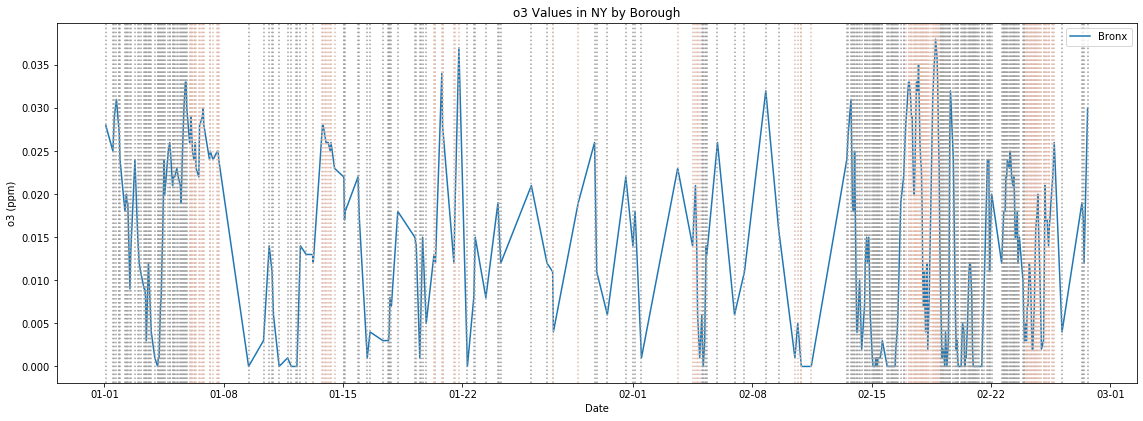

In [134]:
# plot 03 from openaq data
# wider figsize
dates = pd.to_datetime(dfo_bx["utc"])
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([1,1,1,1])
ax.plot(dates, dfo_bx["value"])
ax.plot(dates, dfo_bx["value"])
# weekday overlay not working?
for date in dates :
    if date.weekday()<=4:
         ax.axvline(x=date, color="#9e9e9e",linestyle=":")
    elif date.weekday()>4:
         ax.axvline(x=date, color="#deb8ab",linestyle=":")
# labels
ax.set_xlabel("Date")
ax.set_ylabel("o3 (ppm)")
ax.set_title("o3 Values in NY by Borough")
ax.legend(["Bronx"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()